# Predicition using supervised ML

### Goal: We want to predict Students scores based on their studied hours : 
we will use simple linear regression in this case since we have just 2 variables.

In [50]:
# First we upload the needed libraries and keep updating them based on our needs
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [51]:
# We read the data
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv' 
df= pd.read_csv(url)
print(df)


    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


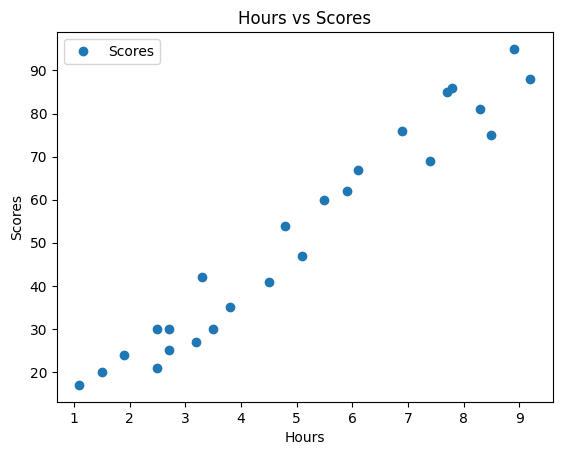

In [52]:
# We want to plot the data distribtution in 2D graph to see the relatonship between the variables
df.plot(x='Hours', y='Scores' , style= 'o')
plt.title('Hours vs Scores' )
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

As the graph shows : the distribution present a strong  linear positive relationship

### Data Preparation 


In [56]:
# We split the data to attributes/features 'x' and outputs/labels
x= df[['Hours']].values
y= df[['Scores']].values



In [57]:
# we have to slpit the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42)
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)

X_train: [[2.7]
 [3.3]
 [5.1]
 [3.8]
 [1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]
 [6.1]
 [7.8]
 [5.5]
 [7.7]
 [1.1]
 [7.4]
 [9.2]]
X_test: [[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]
y_train: [[25]
 [42]
 [47]
 [35]
 [20]
 [27]
 [41]
 [95]
 [75]
 [30]
 [30]
 [24]
 [54]
 [67]
 [86]
 [60]
 [85]
 [17]
 [69]
 [88]]
y_test: [[81]
 [30]
 [21]
 [76]
 [62]]


### Training the data


In [58]:
model= LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

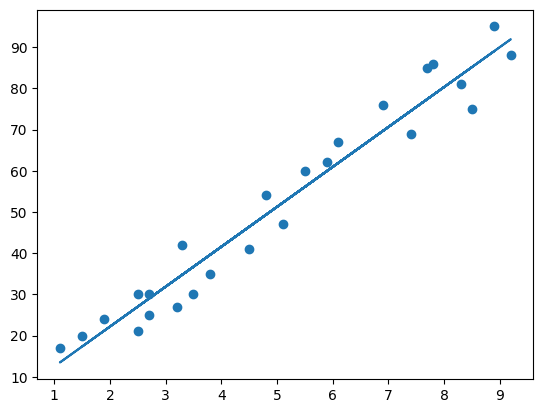

In [59]:
#Plotting the regression line
line= model.coef_*x + model.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()


### Prediction  

In [70]:
#prediciting the scores
y_pred= model.predict(X_test)
#Convert to 1D array
y_test = y_test.ravel()  
y_pred = y_pred.ravel()  
#comparing the prediction vs the actual
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(compare)



   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


In [77]:
#What will be predicted score if a student studies for 9.25 hrs/ day?
own_pred= model.predict([[9.25]])
print(own_pred)


[[92.38611528]]


### Evaluating the model
In order to accept the mmodel we should have a high R-squared value

In [78]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


R-squared (R²): 0.9678055545167994


We can conclude that the model approximately explains 97% of the variability in the target variable, indicating that the model fits the data very well and that most of the variation in scores can be attributed to the number of hours studied.